<a href="https://colab.research.google.com/github/jihan4540/2025-1-myclass-BDA/blob/main/inclass/10w_B_wed_0507_easy_ch08.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 단원 08 그래프 만들기

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
!pip install koreanize-matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 61.1 MB/s eta 0:00:00


In [ ]:
%config InlineBackend.figure_format = 'retina'

In [ ]:
pd.set_option('display.precision', 2)

In [ ]:
!git clone http://github.com/ai7dnn/data

Cloning into 'data'...
remote: Enumerating objects: 24, done.
remote: Counting objects: 100% (24/24), done.
remote: Compressing objects: 100% (22/22), done.
remote: Total 24 (delta 4), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (24/24), 2.14 MiB | 5.54 MiB/s, done.
Resolving deltas: 100% (4/4), done.


In [ ]:
mpg = pd.read_csv('data/mpg.csv')
mpg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   manufacturer  234 non-null    object 
 1   model         234 non-null    object 
 2   displ         234 non-null    float64
 3   year          234 non-null    int64  
 4   cyl           234 non-null    int64  
 5   trans         234 non-null    object 
 6   drv           234 non-null    object 
 7   cty           234 non-null    int64  
 8   hwy           234 non-null    int64  
 9   fl            234 non-null    object 
 10  category      234 non-null    object 
dtypes: float64(1), int64(4), object(6)
memory usage: 20.2+ KB


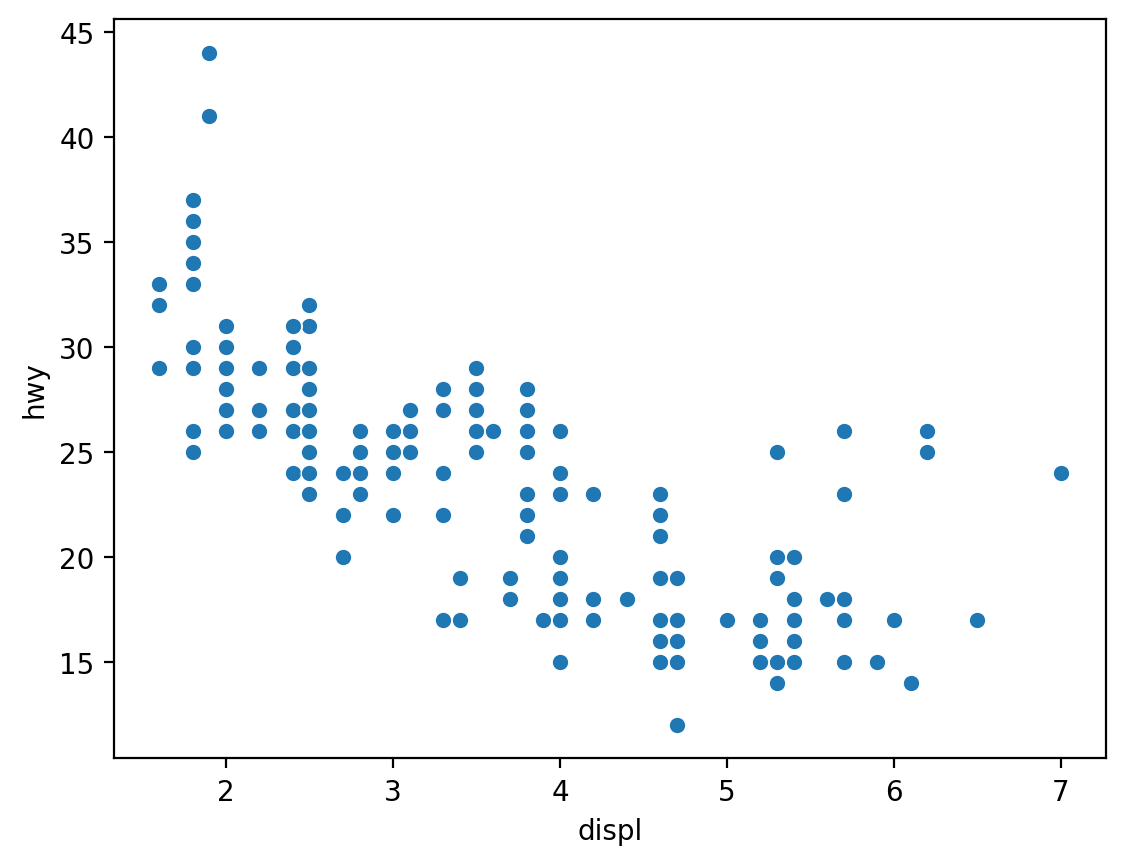

In [ ]:
sns.scatterplot(data = mpg, x = 'displ', y = 'hwy');

<Axes: xlabel='displ', ylabel='hwy'>

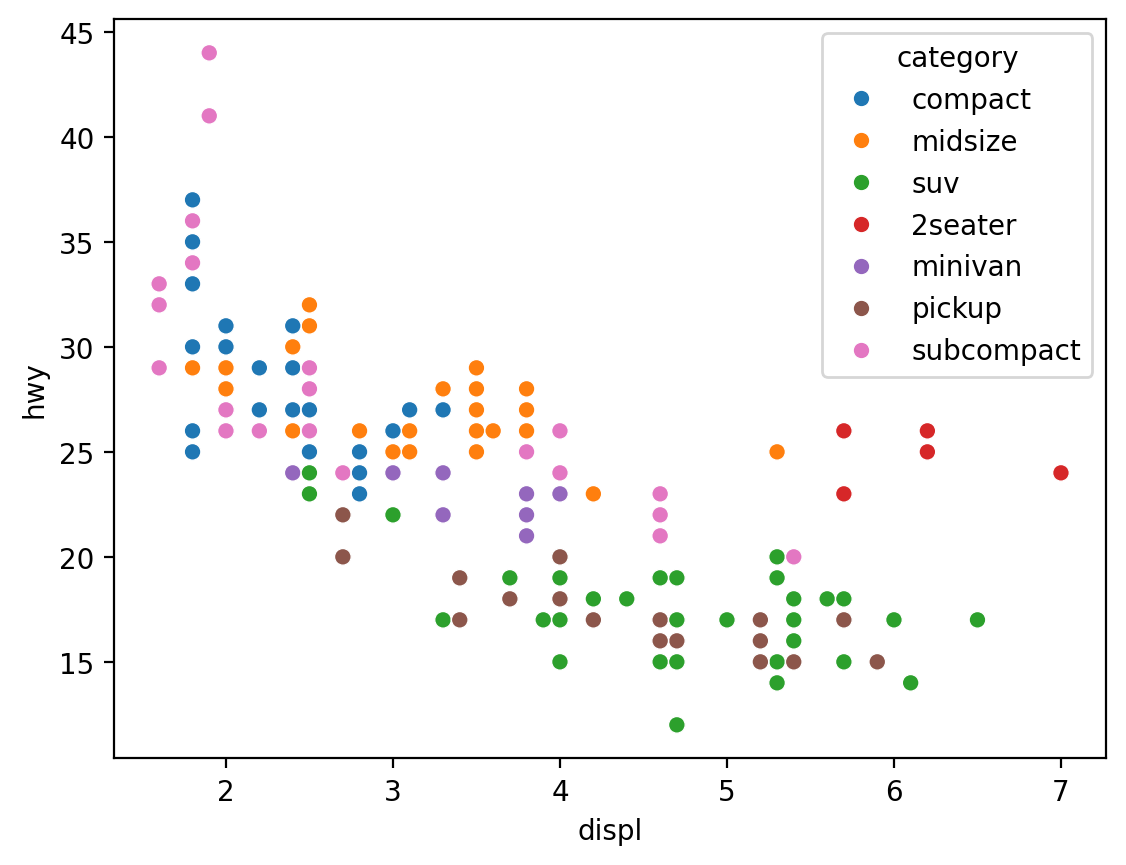

In [ ]:
sns.scatterplot(data = mpg, x = 'displ', y = 'hwy', hue = 'category')

In [ ]:
df_mpg = mpg.groupby('drv').agg(mean_hwy = ('hwy', 'mean'))
df_mpg

,mean_hwy
drv,
4,19.17
f,28.16
r,21.00


In [ ]:
df_mpg = mpg.groupby('drv', as_index = False).agg(mean_hwy = ('hwy', 'mean'))
df_mpg

,drv,mean_hwy
0,4,19.17
1,f,28.16
2,r,21.00


<Axes: xlabel='drv', ylabel='mean_hwy'>

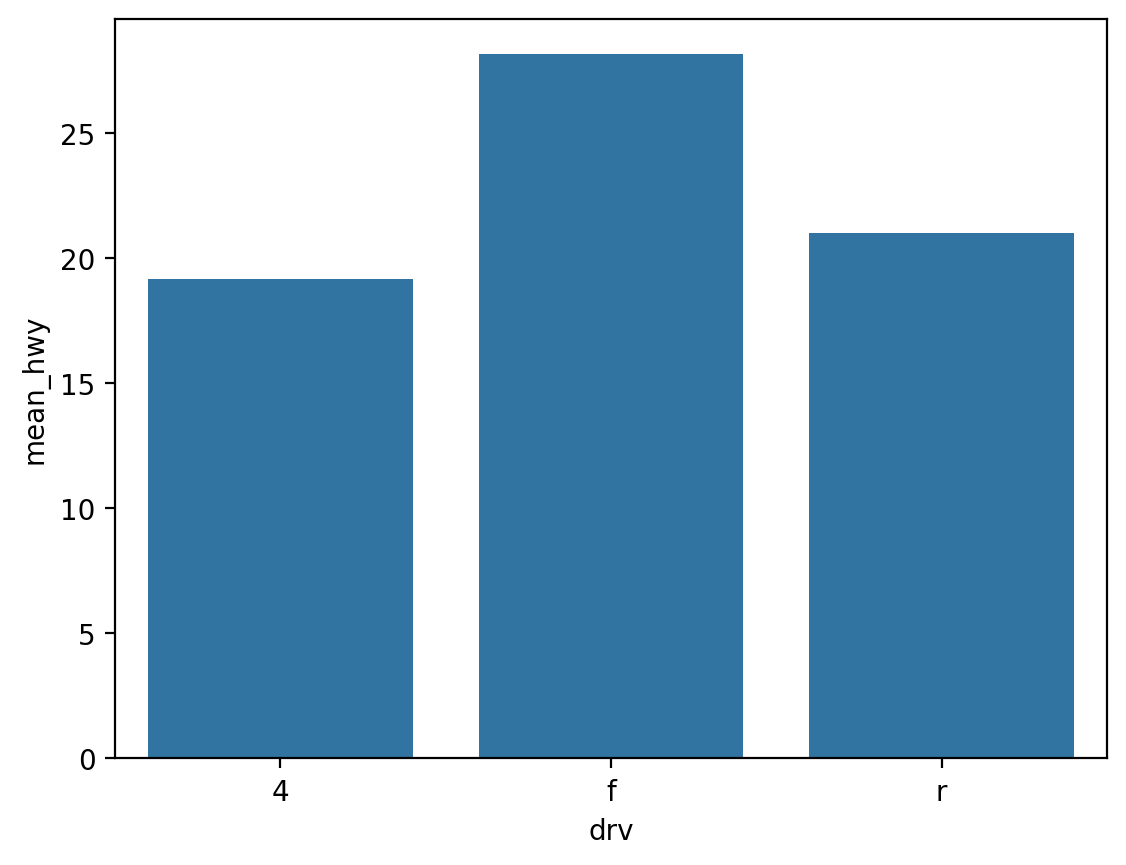

In [ ]:
sns.barplot(data = df_mpg, x = 'drv', y = 'mean_hwy') ##막대그래프

<Axes: xlabel='drv', ylabel='mean_hwy'>

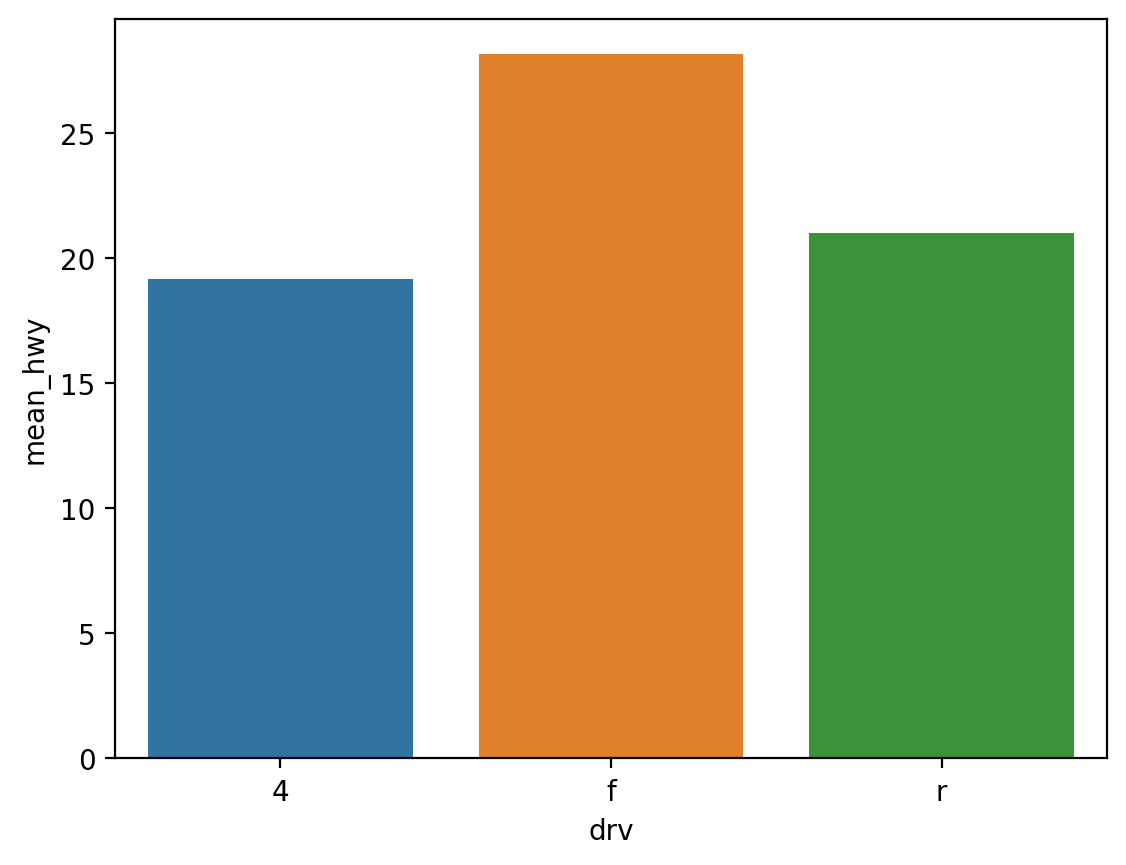

In [ ]:
sns.barplot(data = df_mpg, x = 'drv', y = 'mean_hwy', hue = 'drv')

<Axes: xlabel='drv', ylabel='mean_hwy'>

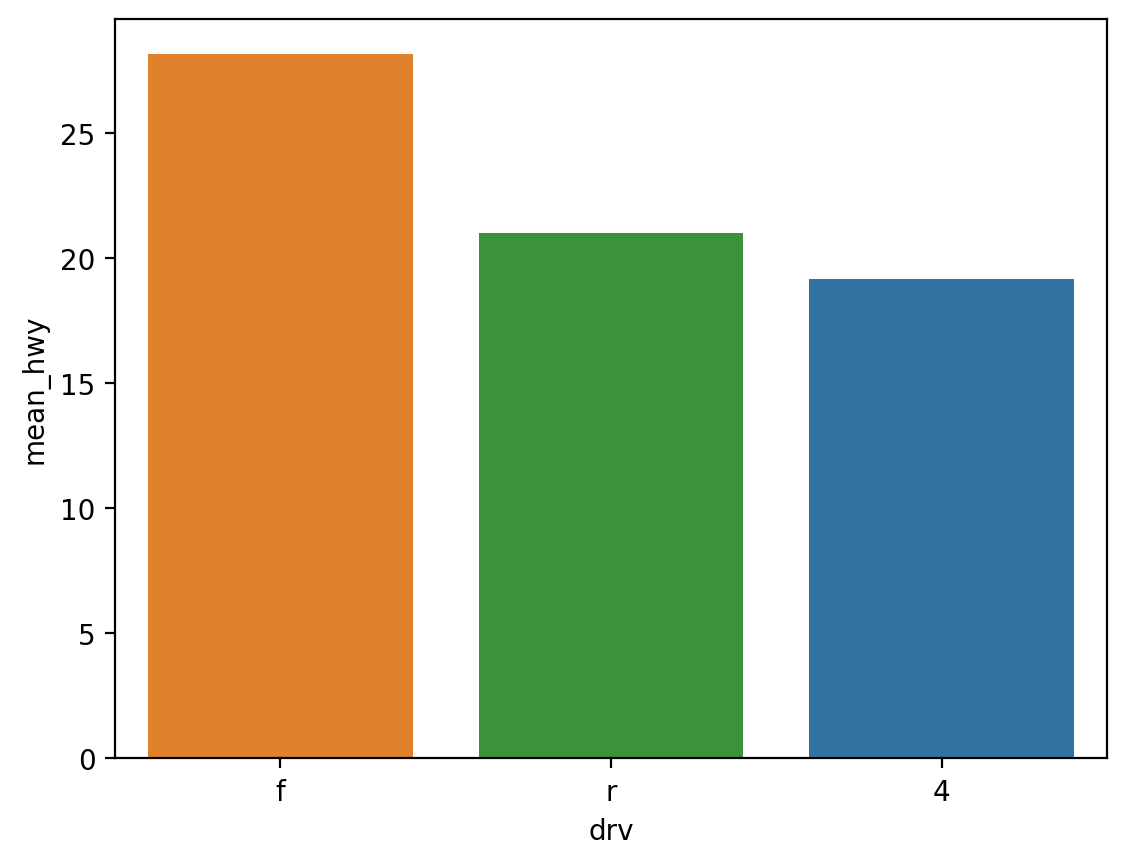

In [ ]:
sns.barplot(data = df_mpg, x = 'drv', y = 'mean_hwy', hue = 'drv', order = ['f', 'r', '4'])

<Axes: xlabel='drv', ylabel='hwy'>

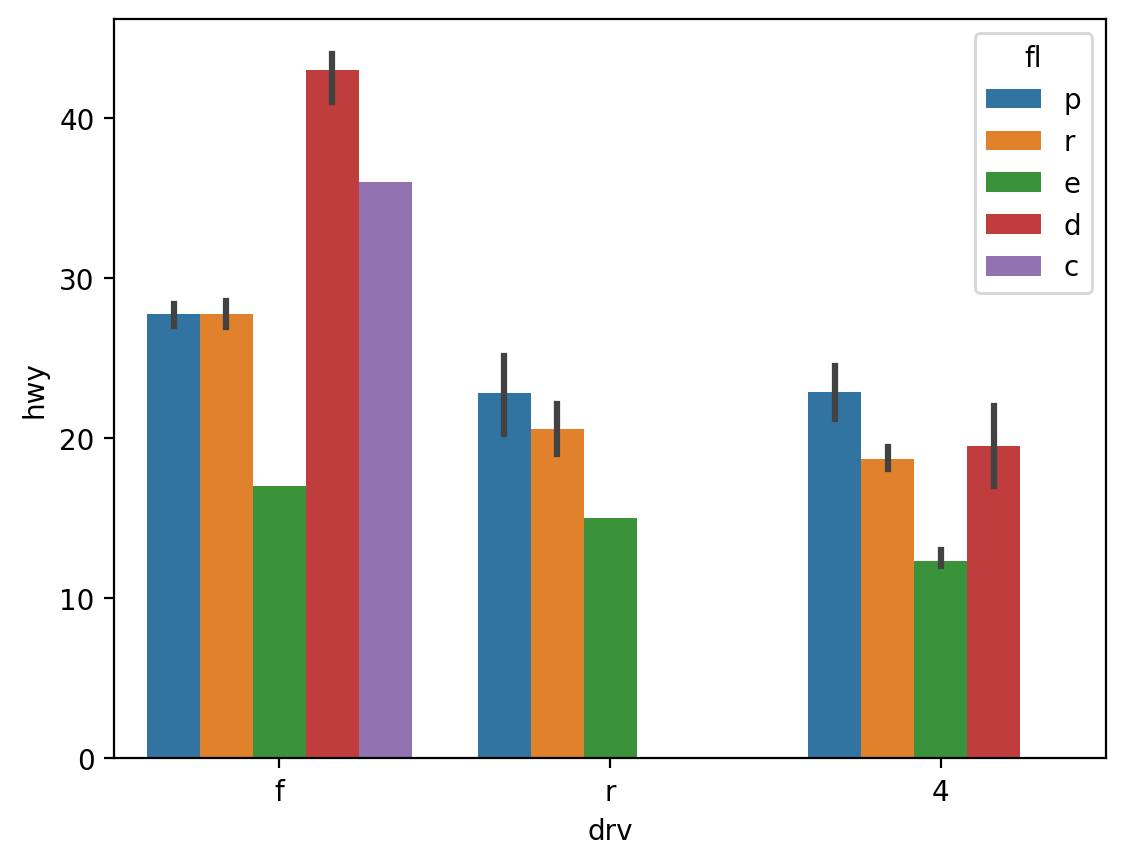

In [ ]:
sns.barplot(data = mpg, x = 'drv', y = 'hwy', hue = 'fl', order = ['f', 'r', '4'])

In [ ]:
mpg.groupby('drv', as_index=False).count()[['drv', 'model']]

,drv,model
0,4,103
1,f,106
2,r,25


In [ ]:
mpg.groupby('drv', as_index=False).count()[['drv', 'model']].rename(columns = {'model':'count'})

,drv,count
0,4,103
1,f,106
2,r,25


In [ ]:
mpg.groupby('drv', as_index=False).count()[['drv', 'model']].rename(columns = {'model':'n'})

,drv,n
0,4,103
1,f,106
2,r,25


In [ ]:
mpg.groupby('drv', as_index=False).agg(n = ('model', 'count'))

,drv,n
0,4,103
1,f,106
2,r,25


In [ ]:
df_mpg = mpg.groupby('drv', as_index=False).agg(n = ('model', 'count'))
df_mpg

,drv,n
0,4,103
1,f,106
2,r,25


In [ ]:
df_mpg = mpg.groupby('drv').agg(n = ('model', 'count'))
df_mpg

,n
drv,
4,103
f,106
r,25


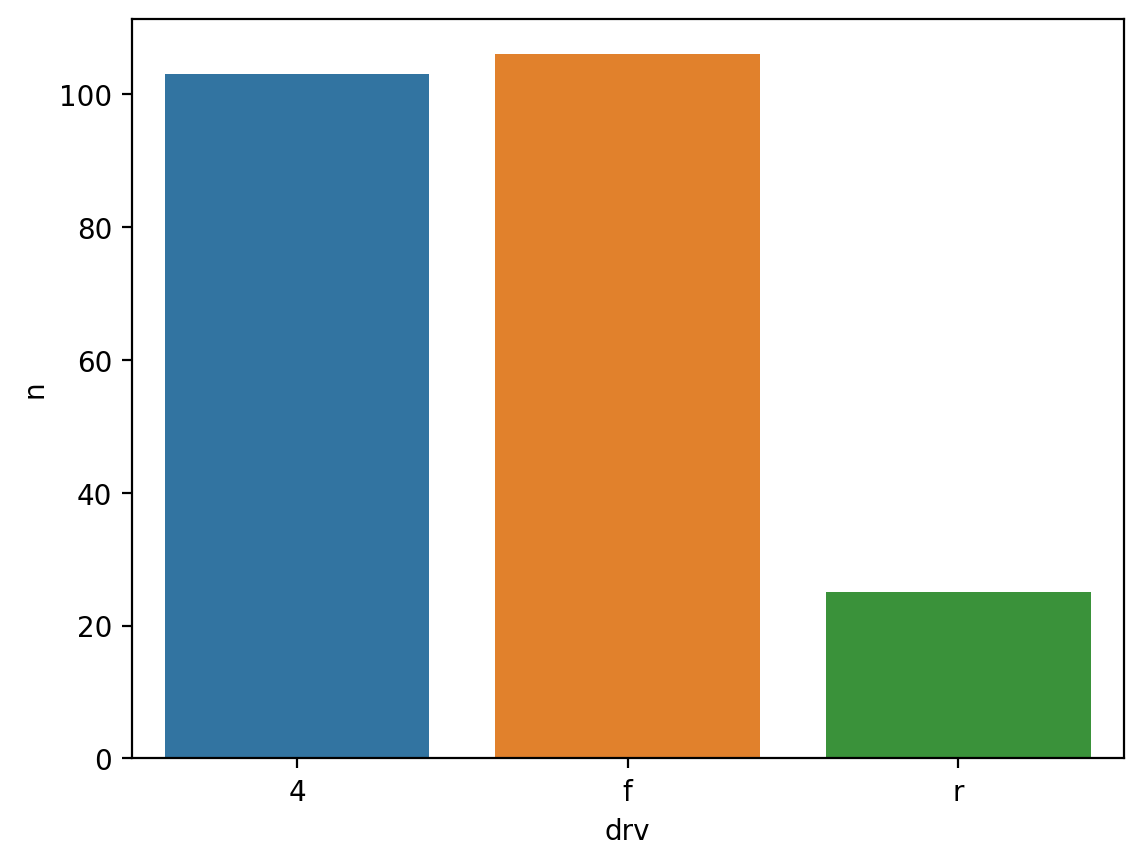

In [ ]:
sns.barplot(data=df_mpg, x='drv', y='n', hue='drv');

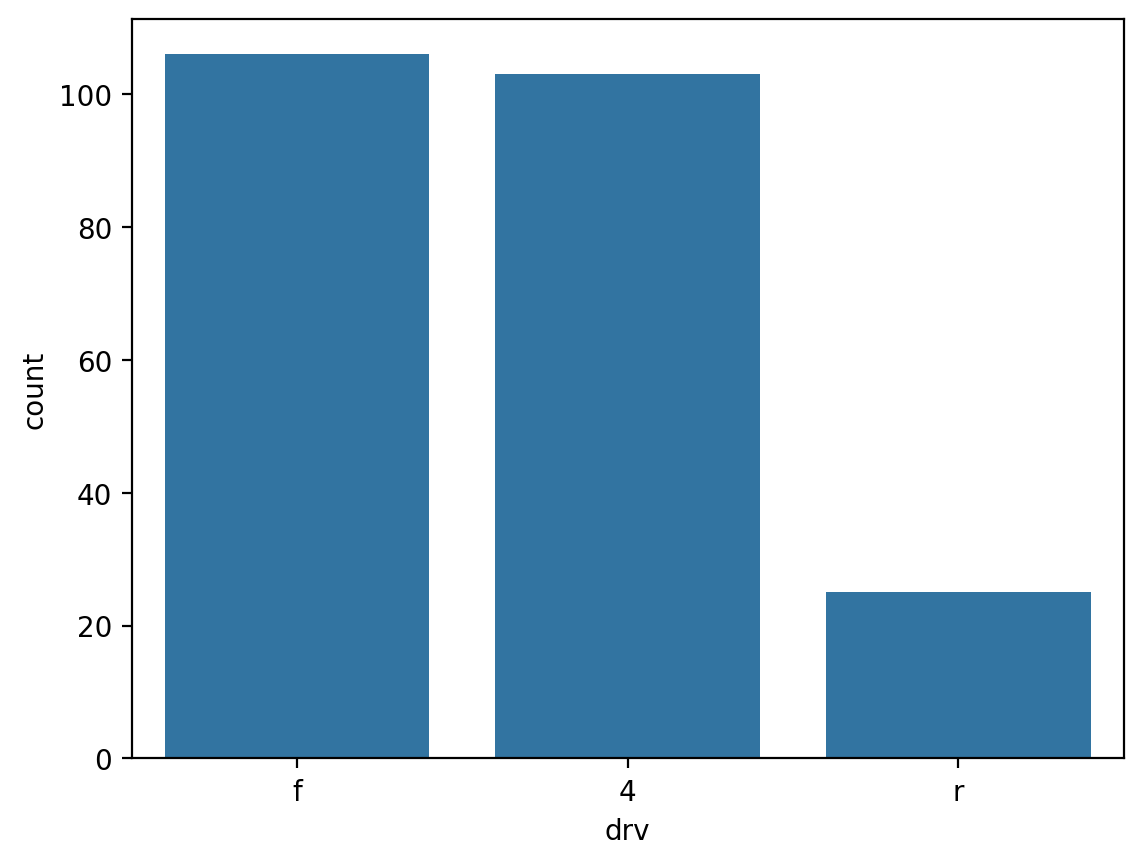

In [ ]:
sns.countplot(data=mpg, x='drv');

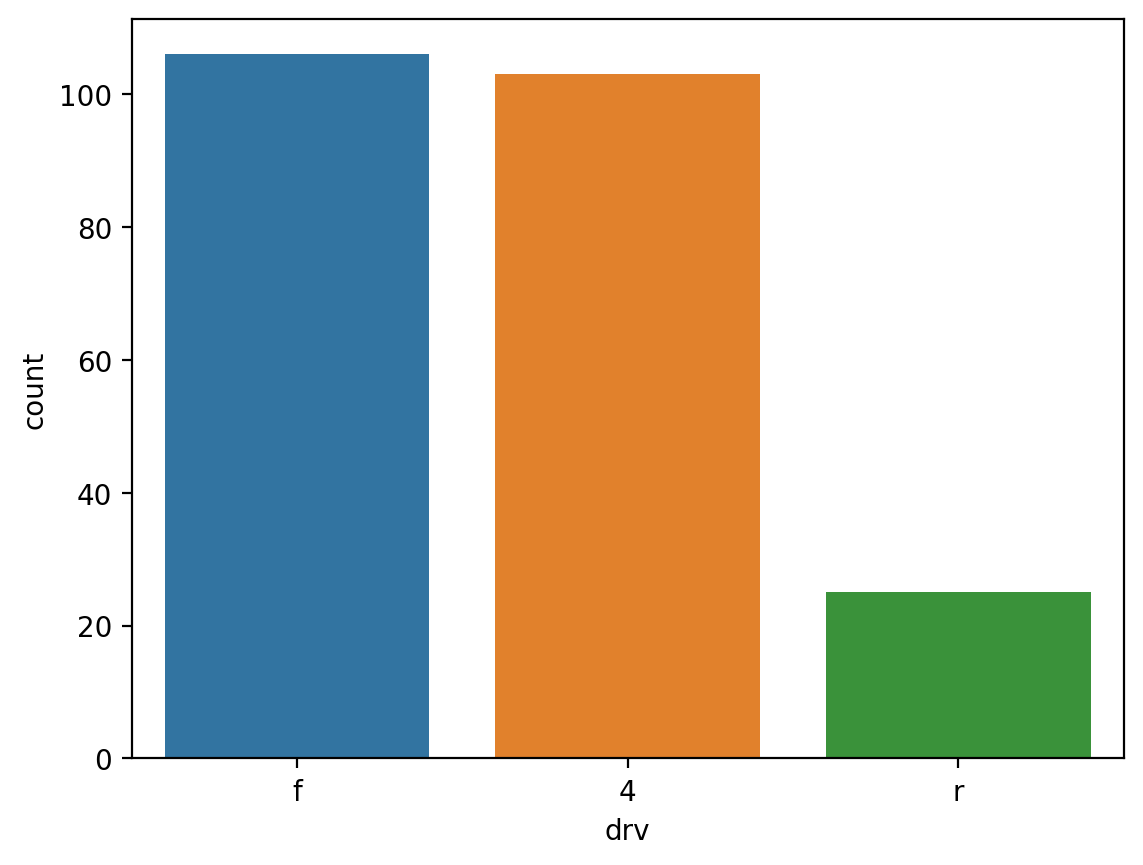

In [ ]:
sns.countplot(data=mpg, x='drv', hue = 'drv');

In [ ]:
mpg.drv.value_counts().index

Index(['f', '4', 'r'], dtype='object', name='drv')

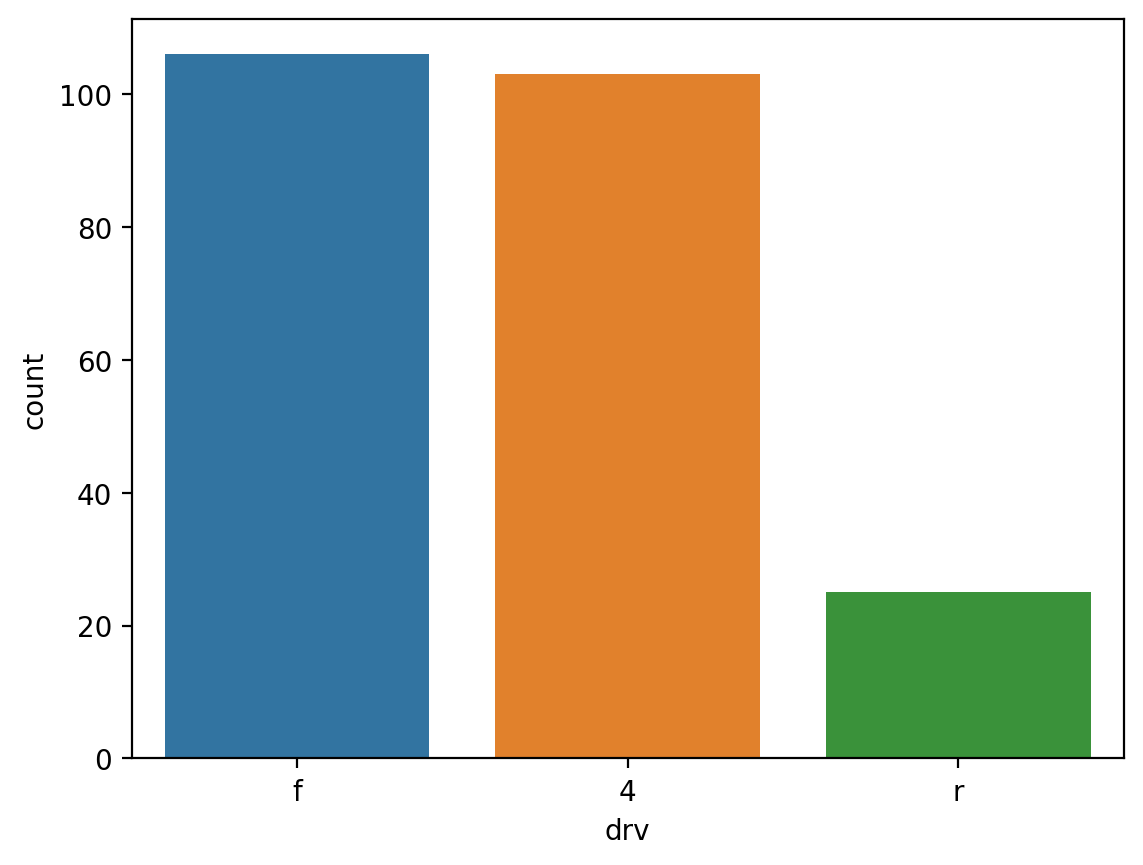

In [ ]:
sns.countplot(data=mpg, x='drv', hue = 'drv', order = mpg.drv.value_counts().index);

In [72]:
!rm -rf data

In [73]:
!git clone http://github.com/ai7dnn/data

Cloning into 'data'...
remote: Enumerating objects: 27, done.
remote: Counting objects: 100% (27/27), done.
remote: Compressing objects: 100% (25/25), done.
remote: Total 27 (delta 5), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (27/27), 2.15 MiB | 5.54 MiB/s, done.
Resolving deltas: 100% (5/5), done.


In [74]:
eco = pd.read_csv('data/economics.csv')

<Axes: xlabel='date', ylabel='unemploy'>

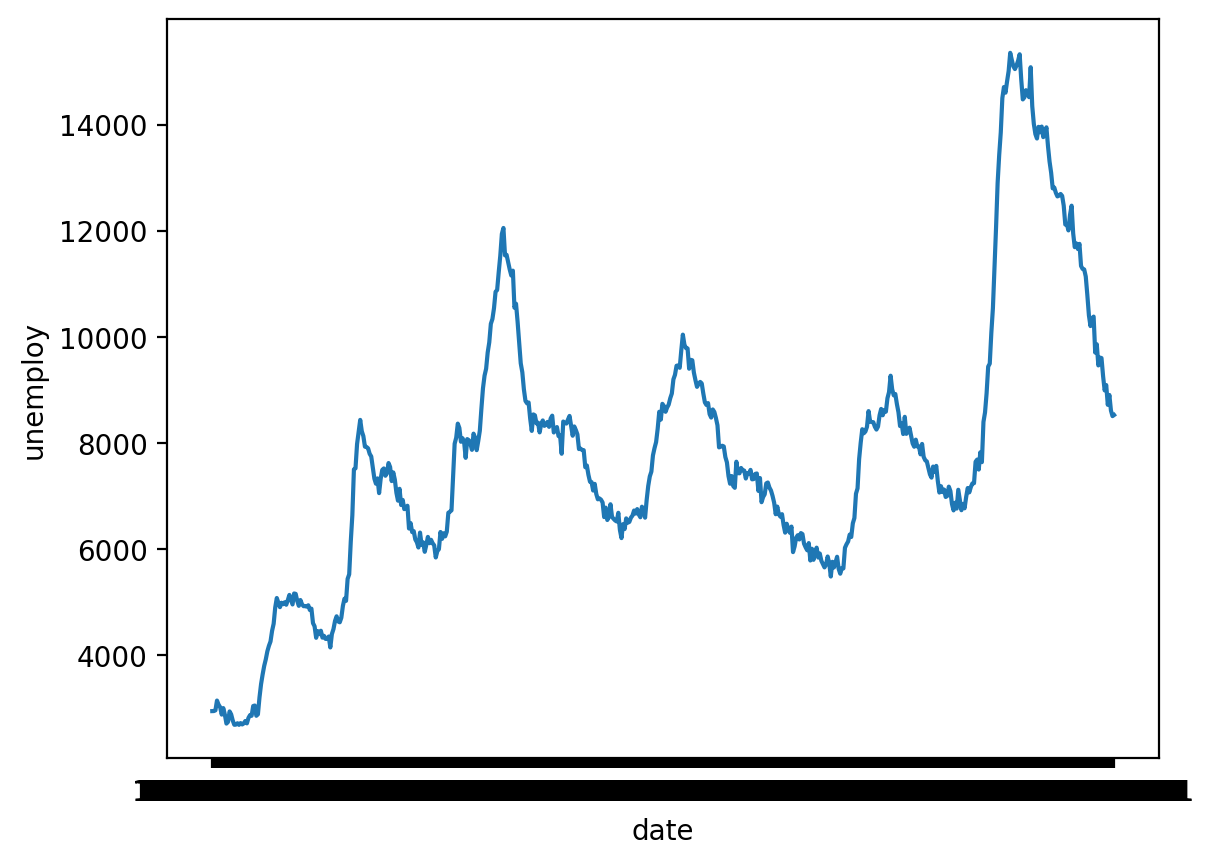

In [76]:
sns.lineplot(data = eco, x = 'date', y = 'unemploy')

<Axes: xlabel='date', ylabel='pce'>

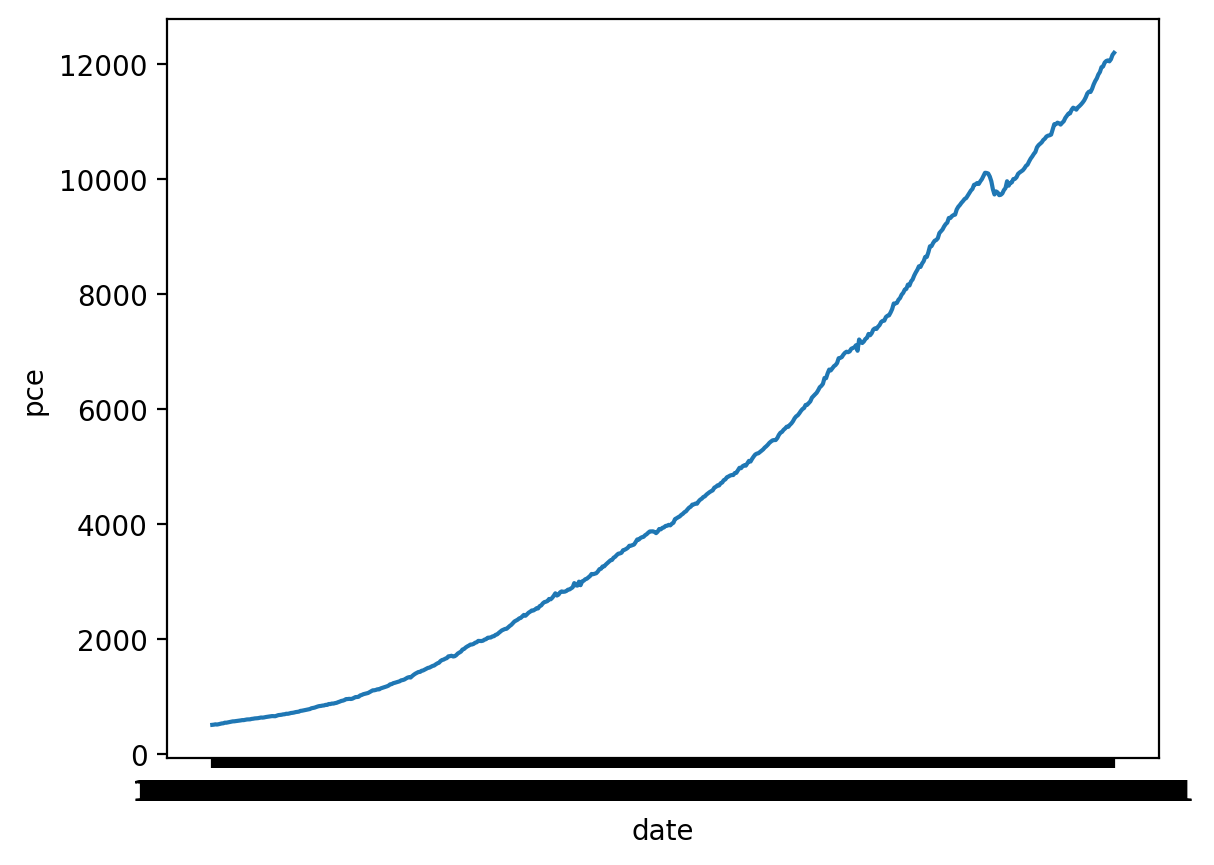

In [78]:
sns.lineplot(data = eco, x = 'date', y = 'pce')

In [79]:
eco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 574 entries, 0 to 573
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   date      574 non-null    object 
 1   pce       574 non-null    float64
 2   pop       574 non-null    float64
 3   psavert   574 non-null    float64
 4   uempmed   574 non-null    float64
 5   unemploy  574 non-null    int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 27.0+ KB


In [81]:
eco['date2'] = pd.to_datetime(eco['date'])

In [82]:
eco[['date', 'date2']]

,date,date2
0,1967-07-01,1967-07-01
1,1967-08-01,1967-08-01
2,1967-09-01,1967-09-01
3,1967-10-01,1967-10-01
4,1967-11-01,1967-11-01
...,...,...
569,2014-12-01,2014-12-01
570,2015-01-01,2015-01-01
571,2015-02-01,2015-02-01
572,2015-03-01,2015-03-01


In [84]:
eco[['date', 'date2']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 574 entries, 0 to 573
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    574 non-null    object        
 1   date2   574 non-null    datetime64[ns]
dtypes: datetime64[ns](1), object(1)
memory usage: 9.1+ KB


In [85]:
eco['date2'].dt.year

,date2
0,1967
1,1967
2,1967
3,1967
4,1967
...,...
569,2014
570,2015
571,2015
572,2015


In [86]:
eco['date2'].dt.month

,date2
0,7
1,8
2,9
3,10
4,11
...,...
569,12
570,1
571,2
572,3


In [87]:
eco['date2'].dt.day

,date2
0,1
1,1
2,1
3,1
4,1
...,...
569,1
570,1
571,1
572,1


In [88]:
eco['year'] = eco['date2'].dt.year
eco['month'] = eco['date2'].dt.year
eco['day'] = eco['date2'].dt.year

In [89]:
eco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 574 entries, 0 to 573
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      574 non-null    object        
 1   pce       574 non-null    float64       
 2   pop       574 non-null    float64       
 3   psavert   574 non-null    float64       
 4   uempmed   574 non-null    float64       
 5   unemploy  574 non-null    int64         
 6   date2     574 non-null    datetime64[ns]
 7   year      574 non-null    int32         
 8   month     574 non-null    int32         
 9   day       574 non-null    int32         
dtypes: datetime64[ns](1), float64(4), int32(3), int64(1), object(1)
memory usage: 38.2+ KB


<Axes: xlabel='year', ylabel='unemploy'>

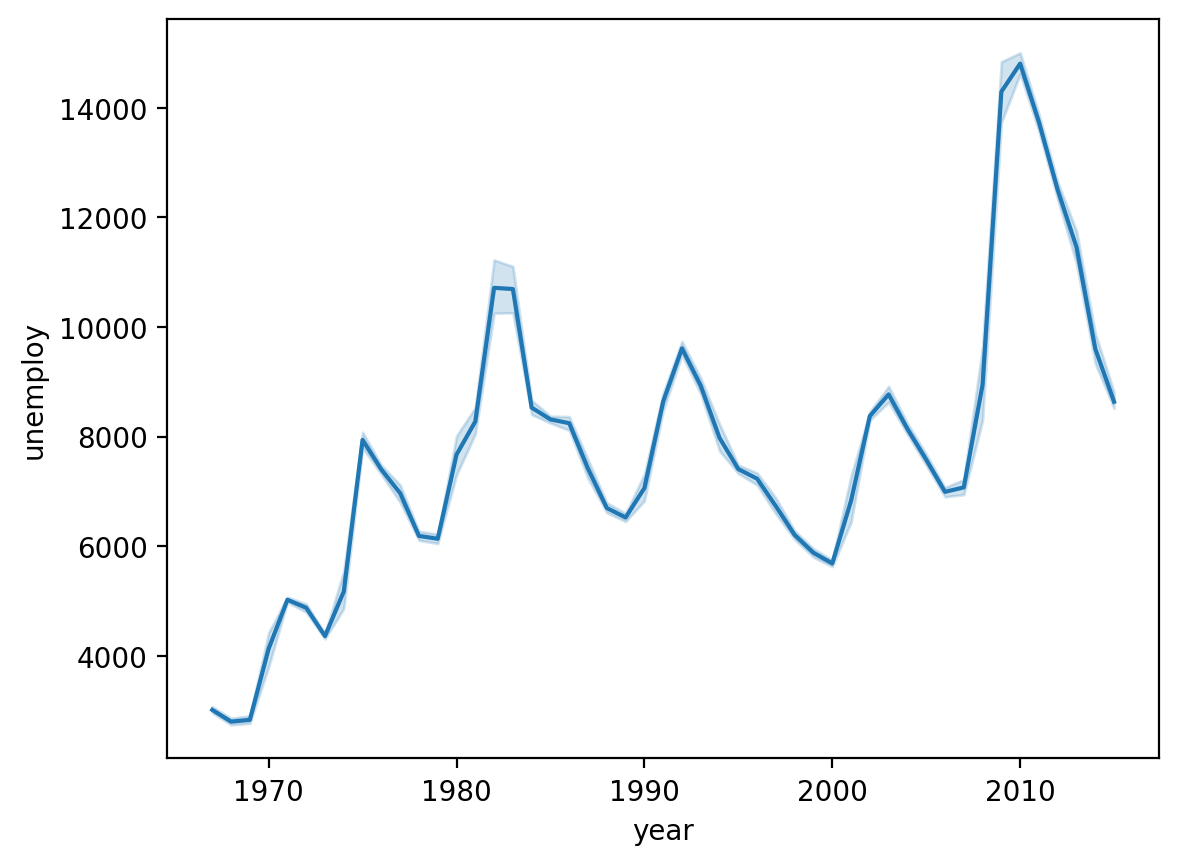

In [90]:
sns.lineplot(data = eco, x = eco['year'], y = 'unemploy')

<Axes: xlabel='year', ylabel='unemploy'>

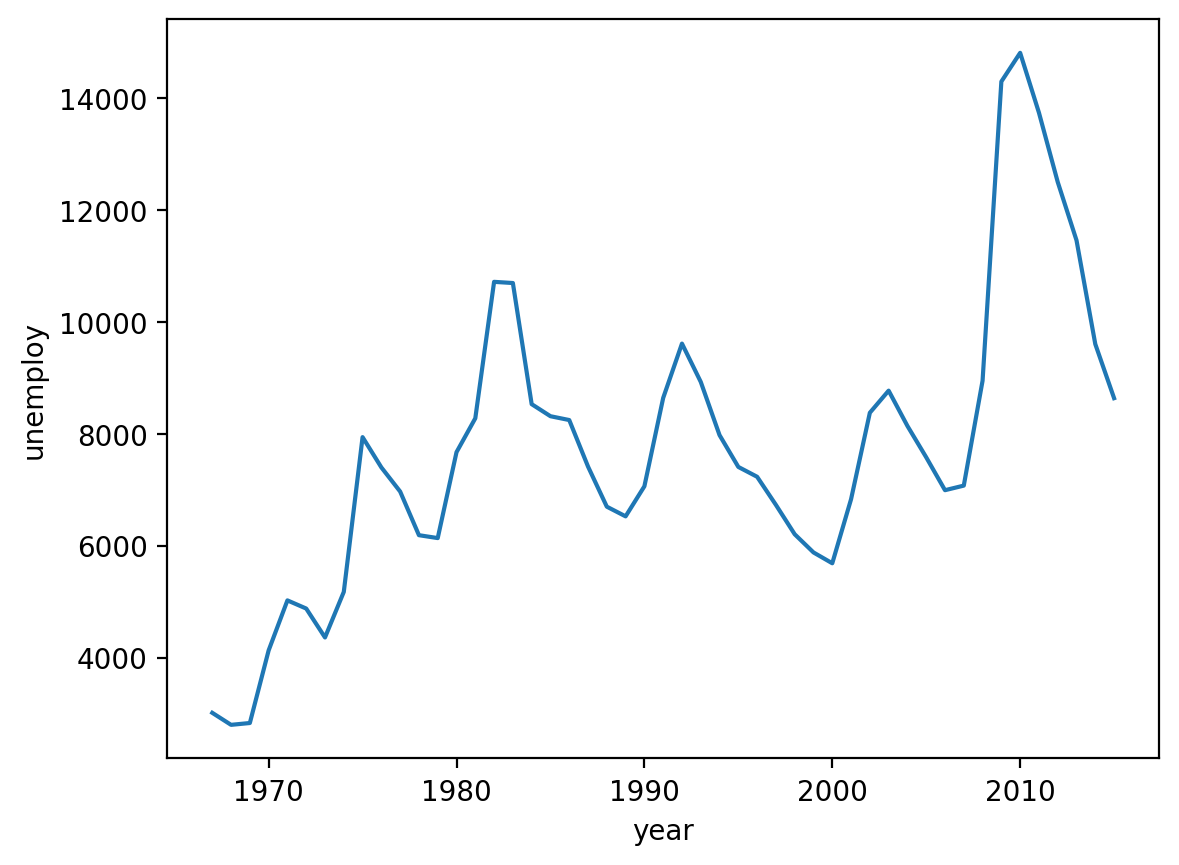

In [91]:
sns.lineplot(data = eco, x = eco['year'], y = 'unemploy', errorbar =None)

### 박스상자의 구성요소 (시험문제 출제 꼭 외우기)
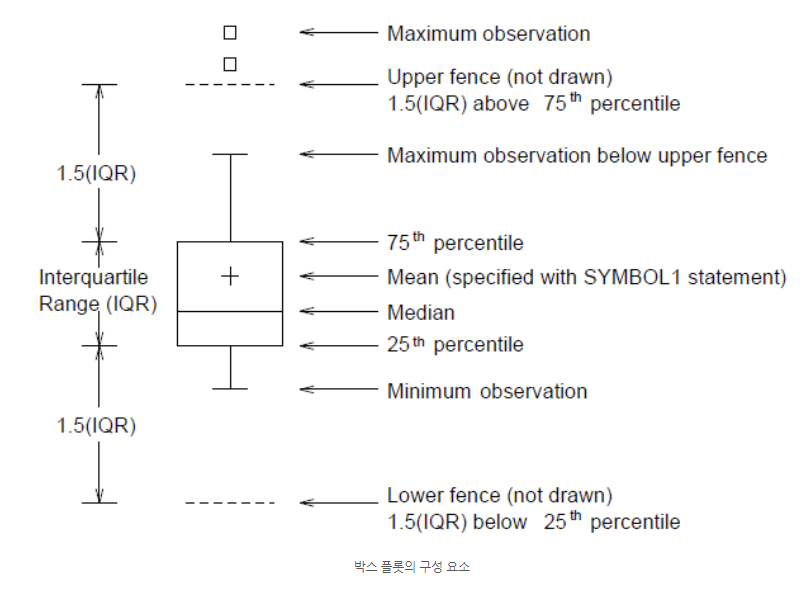

<Axes: xlabel='drv', ylabel='hwy'>

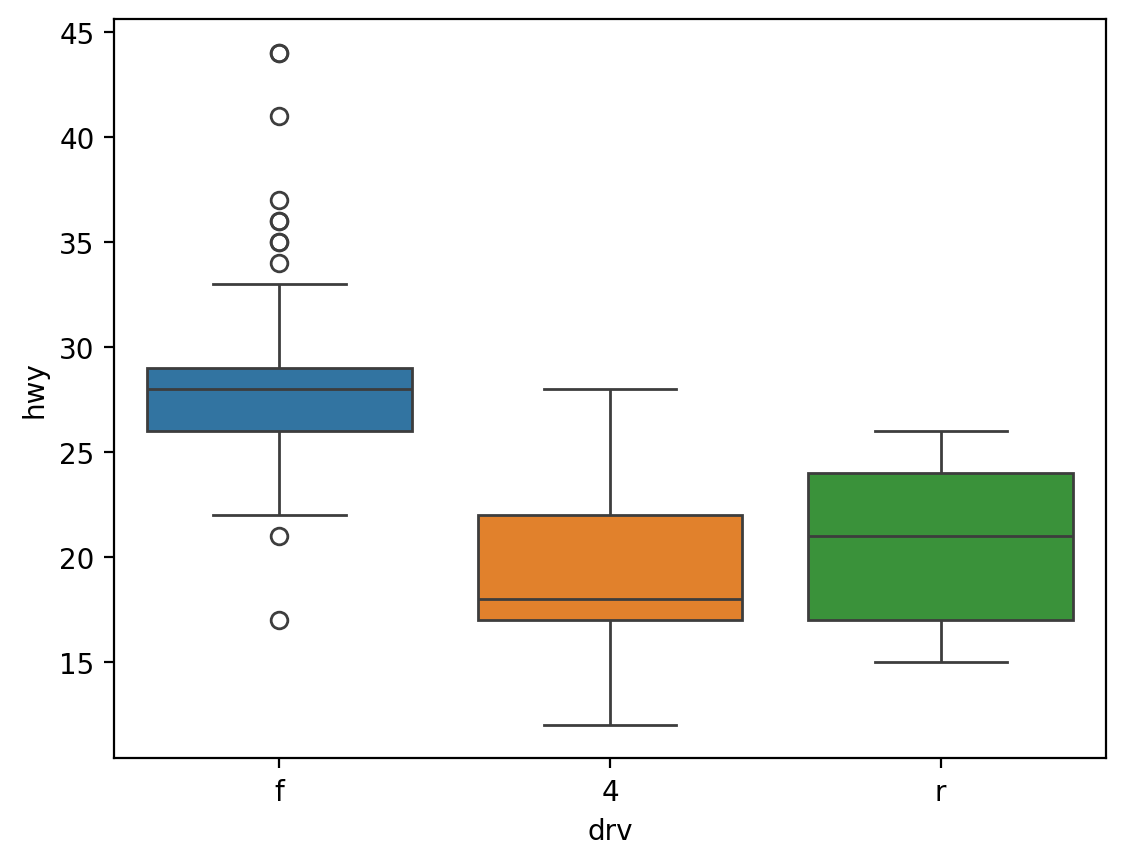

In [92]:
sns.boxplot(data = mpg, x = 'drv', y = 'hwy', hue = 'drv')

In [102]:
plt.rcParams['figure.figsize'] = plt.rcParamsDefault['figure.figsize']

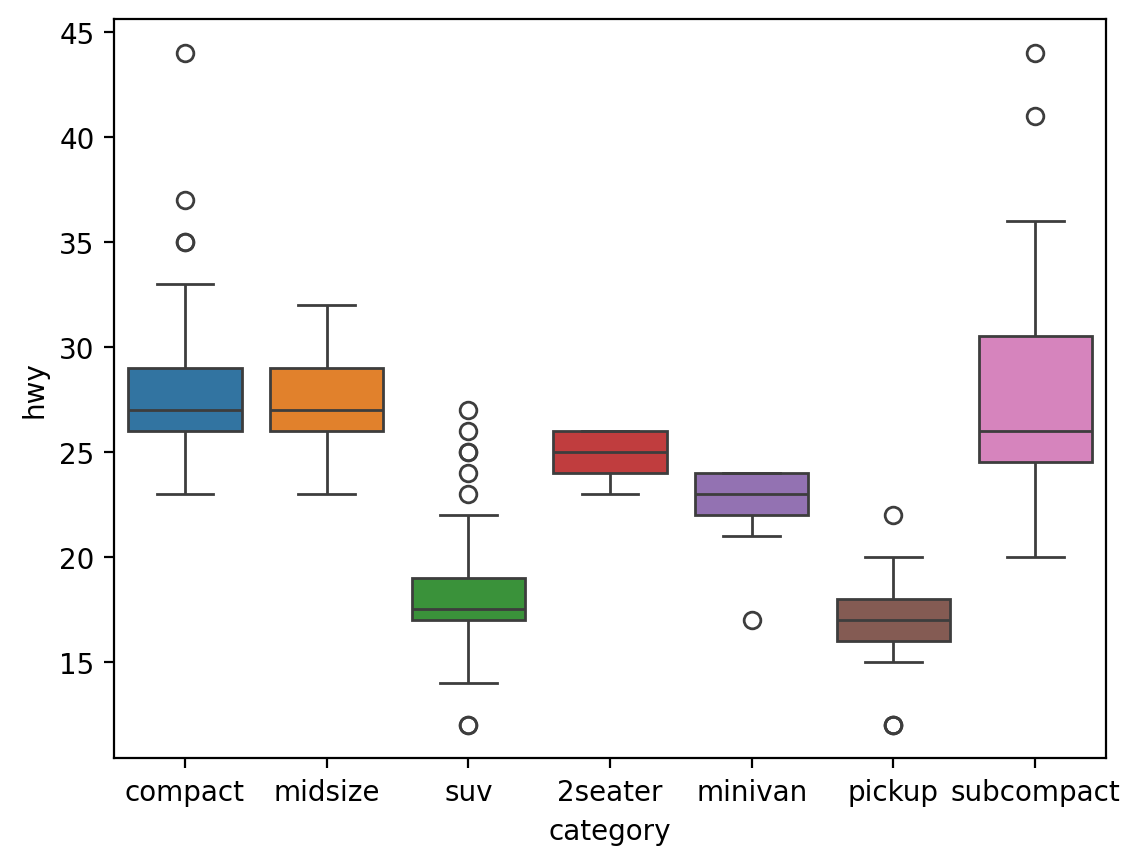

In [103]:
sns.boxplot(data = mpg, x = 'category', y = 'hwy', hue = 'category');

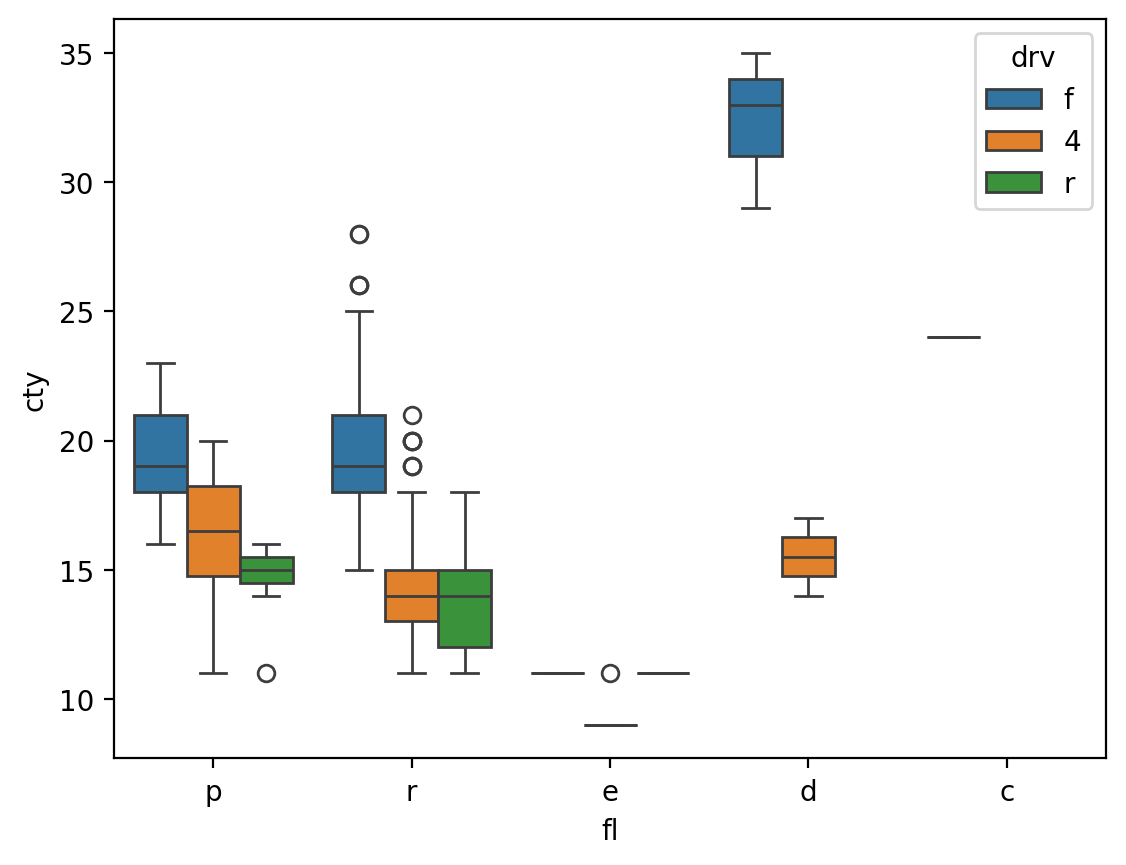

In [104]:
sns.boxplot(data = mpg, x = 'fl', y = 'cty', hue = 'drv');

In [106]:
plt.rcParams.update({'figure.figsize':(5,3)})

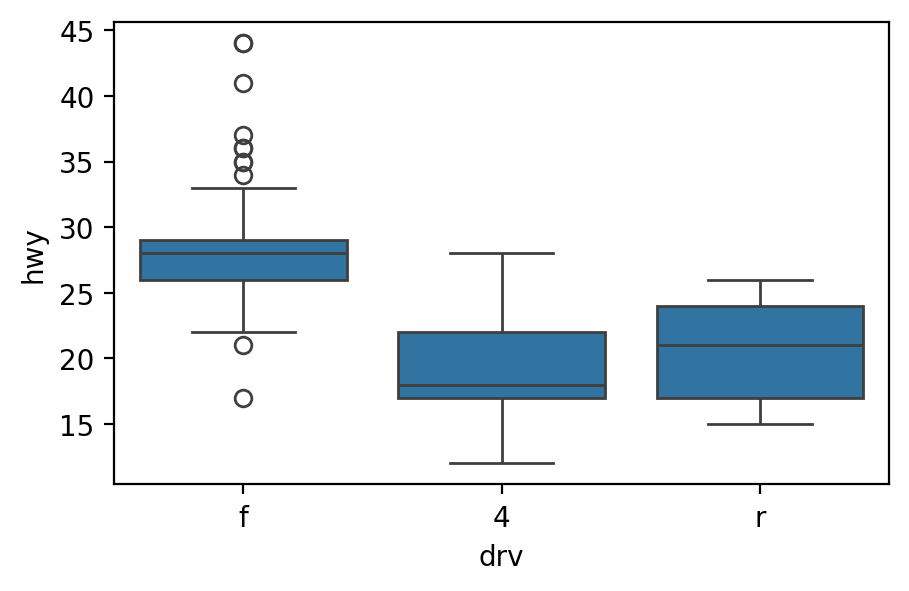

In [107]:
sns.boxplot(mpg, x = 'drv', y = 'hwy');

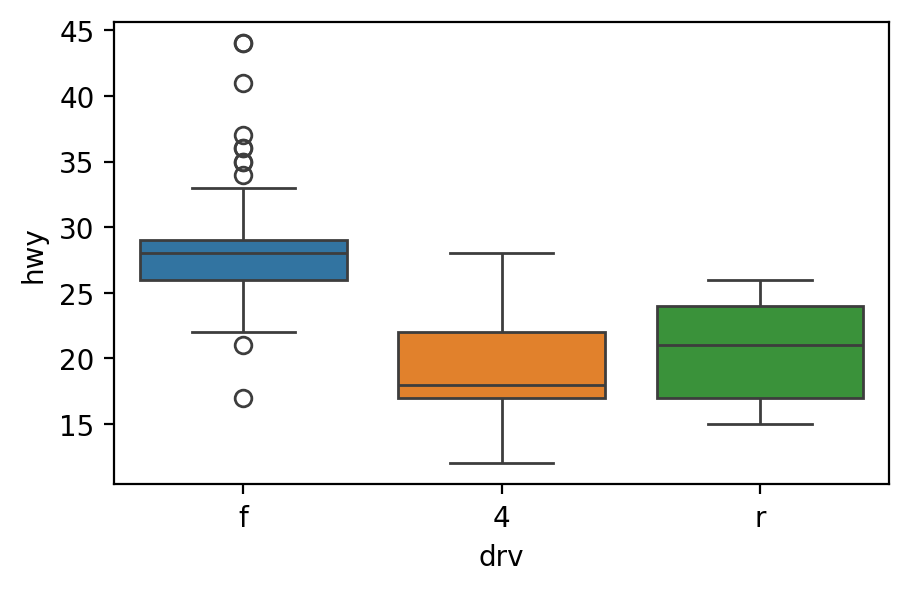

In [108]:
sns.boxplot(mpg, x = 'drv', y = 'hwy', hue = 'drv');

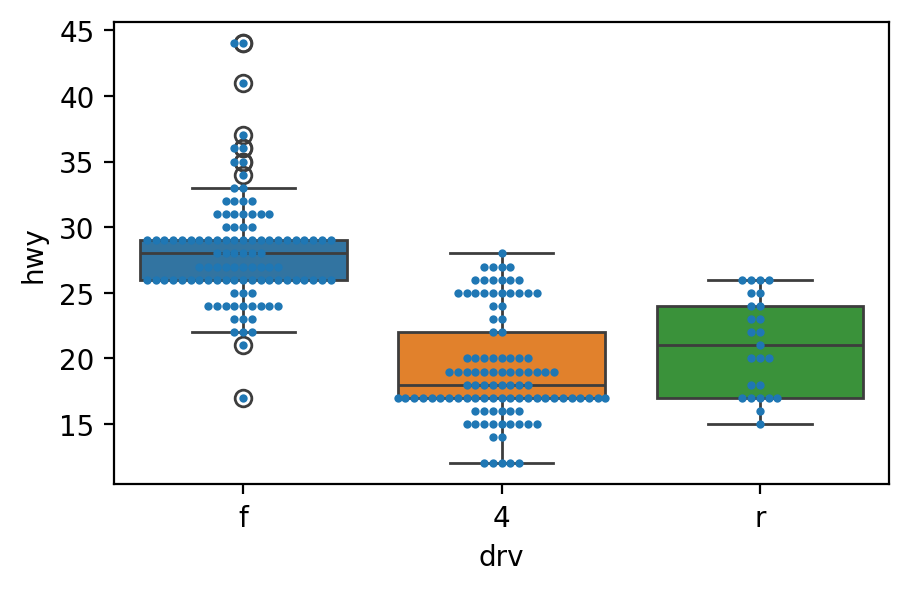

In [109]:
sns.boxplot(mpg, x = 'drv', y = 'hwy', hue = 'drv');
sns.swarmplot(mpg, x = 'drv', y = 'hwy', size = 3);

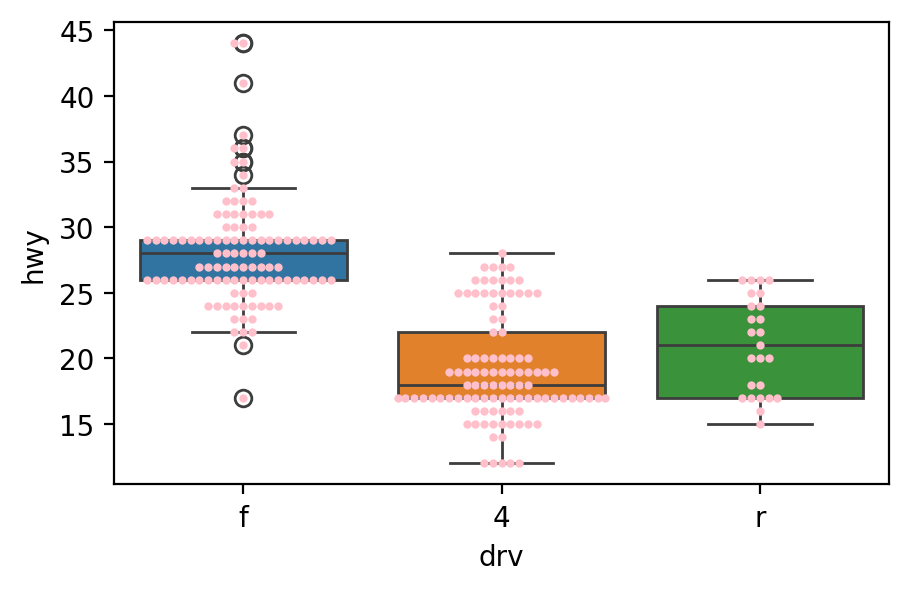

In [110]:
sns.boxplot(mpg, x = 'drv', y = 'hwy', hue = 'drv');
sns.swarmplot(mpg, x = 'drv', y = 'hwy', size = 3, color = 'pink');

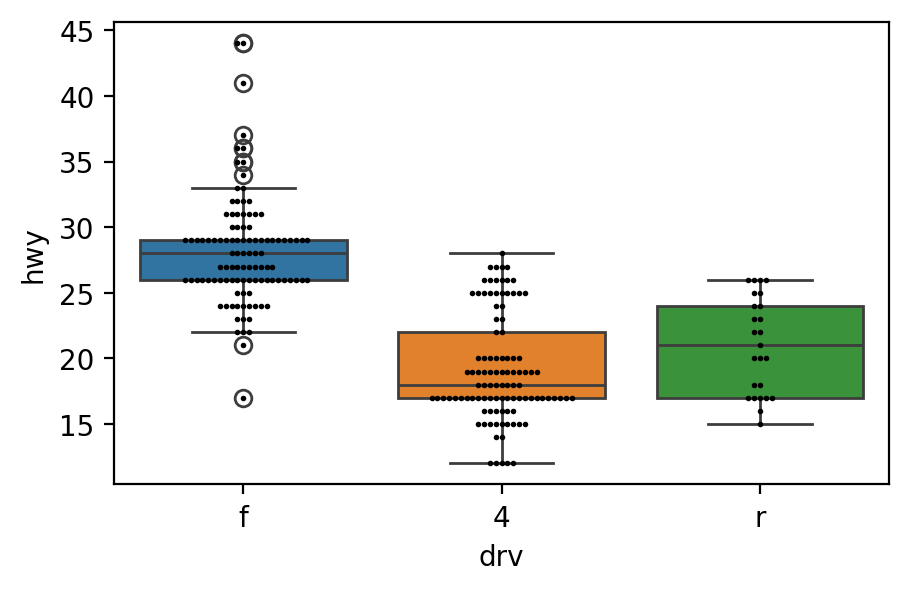

In [112]:
sns.boxplot(mpg, x = 'drv', y = 'hwy', hue = 'drv');
sns.swarmplot(mpg, x = 'drv', y = 'hwy', size = 2, color = 'black');

In [114]:
from IPython.display import display_html
def display_side_by_side(*args):
    """ 여러 데이터프레임 비교가 쉽게 옆쪽으로 표시한다 """
    html_str = ''
    for df in args:
        html_str += df.to_html() + '&nbsp;'*4
    display_html(html_str.replace('table', 'table style="display:inline"'), raw = True)

In [119]:
import pandas as pd

# 중간고사 데이터 만들기
test1 = pd.DataFrame({'id'     : [1, 2, 3, 4, 5],
                        'midterm': [60, 80, 70, 90, 85]})

# 기말고사 데이터 만들기
test2 = pd.DataFrame({'id'     : [1, 2, 3, 4, 5],
                        'final'  : [70, 83, 65, 95, 80]})


In [120]:
display_side_by_side(test1, test2)

,id,midterm
0,1,60
1,2,80
2,3,70
3,4,90
4,5,85
,id,final
0,1,70
1,2,83
2,3,65
3,4,95


## 08 단원 종료

### 정리하기

| seaborn 함수      | 그래프                    |
|-------------------|---------------------------|
| sns.scatterplot() | 산점도                    |
| sns.barplot()     | 막대 그래프 - 요약표 활용 |
| sns.countplot()   | 막대 그래프 - 원자료 활용 |
| sns.lineplot()    | 선 그래프                 |
| sns.boxplot()     | 상자 그림                 |

### 1. 산점도
sns.scatterplot(data = mpg, x = 'displ', y = 'hwy')

# 축 제한
sns.scatterplot(data = mpg, x = 'displ', y = 'hwy') \
   .set(xlim = [3, 6], ylim = [10, 30])

# 종류별로 표식 색깔 바꾸기
sns.scatterplot(data = mpg, x = 'displ', y = 'hwy', hue = 'drv')


### 2. 막대 그래프

## 평균 막대 그래프

# 1단계. 평균표 만들기
df_mpg = mpg.groupby('drv', as_index = False) \
            .agg(mean_hwy = ('hwy', 'mean'))

# 2단계. 그래프 만들기
sns.barplot(data = df_mpg, x = 'drv', y = 'mean_hwy')

## 빈도 막대 그래프
sns.countplot(data = mpg, x = 'drv')


### 3. 선 그래프
sns.lineplot(data = economics, x = 'date', y = 'unemploy')


### 4. 상자 그림
sns.boxplot(data = mpg, x = 'drv', y = 'hwy')